In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimental-analysis-movie-review/kalki_movie_reviews.csv


In [3]:
# Load Python libraries and the dataset:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("/kaggle/input/sentimental-analysis-movie-review/kalki_movie_reviews.csv")
print(data.head())

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                                            Comments  Ratings
0  I didnt go in with big hopes, but i was expect...        8
1  A unique genre, a well written story (script) ...        8
2  Majestic at scale, grandeur in VFX, and great ...        9
3  "Kalki 2898" is not just a movie; it's an expe...       10
4  Best Indian movie Nagi combined Hindu mytholog...       10


This dataset only contains two columns as Comments and Ratings. So let’s get started with the task of kalki_movie sentiment analysis with Python by importing the necessary librairies


 extract the index and values from a "Ratings" in a dataset, 

In [7]:
for index, value in data['Ratings'].items():
    print(f"Index: {index}, Value: {value}")


Index: 0, Value: 8
Index: 1, Value: 8
Index: 2, Value: 9
Index: 3, Value: 10
Index: 4, Value: 10
Index: 5, Value: 10
Index: 6, Value: 10
Index: 7, Value: 6
Index: 8, Value: 9
Index: 9, Value: 6
Index: 10, Value: 4
Index: 11, Value: 9
Index: 12, Value: 8
Index: 13, Value: 9
Index: 14, Value: 8
Index: 15, Value: 10
Index: 16, Value: 10
Index: 17, Value: 6
Index: 18, Value: 10
Index: 19, Value: 7
Index: 20, Value: 1
Index: 21, Value: 10
Index: 22, Value: 10
Index: 23, Value: 8
Index: 24, Value: 8
Index: 25, Value: 8
Index: 26, Value: 8
Index: 27, Value: 9
Index: 28, Value: 10
Index: 29, Value: 10
Index: 30, Value: 10
Index: 31, Value: 10
Index: 32, Value: 6
Index: 33, Value: 9
Index: 34, Value: 6
Index: 35, Value: 4
Index: 36, Value: 9
Index: 37, Value: 8
Index: 38, Value: 9
Index: 39, Value: 8
Index: 40, Value: 10
Index: 41, Value: 10
Index: 42, Value: 6
Index: 43, Value: 10
Index: 44, Value: 7
Index: 45, Value: 1
Index: 46, Value: 10
Index: 47, Value: 10
Index: 48, Value: 8
Index: 49, V

This dataset is very large and luckily there are no missing values so without wasting any time let’s take a quick look at the distribution of comments ratings

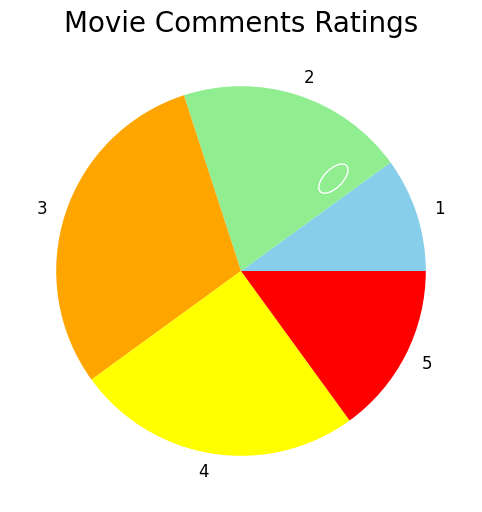

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse  #import ellipse from matplotlib.patches

# Example data
review_colors = ["skyblue", "lightgreen", 'orange', "yellow", "red"]
quantity = [10, 20, 30, 25, 15]
numbers = ["1", "2", "3", "4", "5"]  # Labels for pie chart

# Create and display  (pie chart)
plt.figure(figsize=(10, 6))
plt.pie(quantity, labels=numbers, colors=review_colors)

# add ellipse like artist
ellipse = Ellipse((0.5, 0.5), width=0.2, height=0.1, angle=45, edgecolor='white', facecolor='none')

# Retrieve the current figure and add the ellipse to the current axis
fig = plt.gcf()
fig.gca().add_artist(ellipse)

# Configure the font and add a title
plt.rc('font', size=12)
plt.title("Movie Comments Ratings", fontsize=20)

# Display chart
plt.show()



Now let’s move forward by analyzing the sentiments of movies comments. To analyze the sentiment of the movies comments, I’ll add three additional columns to 
this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the comments:

In [21]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Comments"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Comments"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Comments"]]
print(data.head())

                                            Comments  Ratings  Positive  \
0  I didnt go in with big hopes, but i was expect...        8     0.195   
1  A unique genre, a well written story (script) ...        8     0.153   
2  Majestic at scale, grandeur in VFX, and great ...        9     0.176   
3  "Kalki 2898" is not just a movie; it's an expe...       10     0.184   
4  Best Indian movie Nagi combined Hindu mytholog...       10     0.274   

   Negative  Neutral  
0     0.089    0.716  
1     0.016    0.831  
2     0.022    0.803  
3     0.044    0.773  
4     0.092    0.634  


I will look at how most spectators think about movies based on the sentiment of their comments

In [26]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


most spectators feel neutral about movies views 

We will explain the sentiments scores

In [27]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  871.9999999999949
Negative:  287.00000000000136
Neutral:  3841.3999999998796


The sentiment analysis results reveal an interesting distribution of emotions expressed in the comments.

Positive: A score of 872 shows that positive feelings are present but moderate compared to other emotions. This indicates that there are elements of satisfaction or happiness in the comments, but these emotions are not dominant.

Negative: With a score of 287, negative sentiments are relatively low. This suggests that the comments contains some elements of frustration or discontent, but these emotions are less pronounced compared to the others.

Neutral: The score 3841.4 reveals that the majority of emotions expressed in the comments are neutral. This means that many passages are factual or without strong emotional involvement, which may indicate more objective or balanced communication.